# Graded: 7 of 7 correct
- [x] bubble or insertion
- [x] merge or quick
- [x] timing function
- [x] create random arrays
- [x] time bubble/insertion on random arrays
- [x] time merge/quick on random arrays
- [x] plot of times


Comments: 

# Assignment 9: Comparing sorting algorithms

## Creating sorting functions
Create functions for two of the sorting algorithms introduced in this unit:
1. Bubble or insertion sort
2. Merge or quick sort

The functions must accept an array and return the sorted array.

##### Bubble vs Merge

as seen on the exercise on this same unit

In [3]:
# Bubble sort. Sorry I copy paste the bubble short from the exercise from this same unit
def bubble_sort(arr):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr


In [4]:
# Merge function
def merge(left, right):
    result = []
    left_index, right_index = 0, 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])
    return result


# Merge sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2 # floor division 15 //2 = 7
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    merged = merge(left_half, right_half)

    return merged


## Timing function
Below is an example function that uses the `time` library's `perf_counter_ns` to calculate the elapsed time of a `sorting_function()` in nanoseconds:
```
import time

def get_elapsed_time(array):
    start = time.perf_counter_ns()
    sorted_array = sorting_function(array)
    end = time.perf_counter_ns()
    elapsed_time = end - start
    
    return elapsed_time
```
Use the `perf_counter_ns` to create a function to return the time your sorting algorithms take to run.

In [5]:
import time

def get_elapsed_time(array, func_name):
    start = time.perf_counter_ns()
    if func_name == "merge":
        sorted_array = merge_sort(array)
    elif func_name == "bubble":
        sorted_array = bubble_sort(array)
    end = time.perf_counter_ns()
    elapsed_time = end - start
    
    return elapsed_time

# Time arrays of different lengths
Create random arrays of length 100, 1000, and 10000. Time both of your sorting functions on each array and then plot the results using length as the `x` variable and time as the `y` variable.

Arrays can be created using the NumPy `randint` function. Below is an example for creating a an array of 100 random integers between 0 and 1000:
`np.random.randint(low=0, high=1000, size=100)`

In [6]:
# Random array function
import numpy as np

def get_random_arrays():    
    random_arrays = [np.random.randint(low=0, high=1000, size=10**i) for i in range(2, 5) if i ]
    for arr in random_arrays:
        print(arr.shape)

    return random_arrays

In [7]:
# Make random arrays
random_arrays = get_random_arrays()

(100,)
(1000,)
(10000,)


In [8]:
merge_times = [get_elapsed_time(arr, "merge") for arr in random_arrays]
bubble_times = [get_elapsed_time(arr, "bubble") for arr in random_arrays]

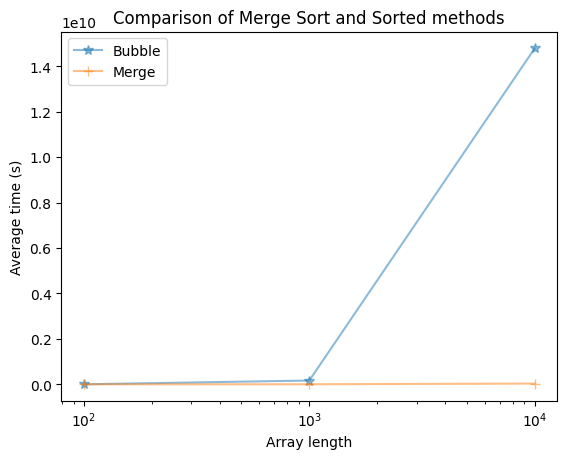

In [10]:
import matplotlib.pyplot as plt

x = [len(arr) for arr in random_arrays]

fig, ax = plt.subplots(1)
ax.plot(x, bubble_times, marker="*", markersize=7, alpha=0.5, label="Bubble")
ax.plot(x, merge_times, marker="+", markersize=7, alpha=0.5, label="Merge")
ax.set_xscale("log")
ax.set_title("Comparison of Merge Sort and Sorted methods")
ax.set_xlabel("Array length")
ax.set_ylabel("Average time (s)")
ax.legend()
plt.show()